In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Implementation from https://www.codearmo.com/blog/pricing-options-monte-carlo-simulation-python

$ln(S_{T}) = ln(S_{0}) + \displaystyle \int_{0}^t(\mu - \frac{\sigma^2}{2})dt + \displaystyle \int_{0}^t \sigma dW(t)$

This is the formula used by codeArmo for the European options. ST is the price at time T, sigma is the annual volatility, mu is the risk free rate and is calculated by risk free rate - annual dividend rate, dW(t) is a the function that adds random noise. T is represented in fraction of a year. 1/2 is 6 months

In [12]:
def geo_paths(S, T, r, q, sigma, steps, N): #monte carlo paths
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps

    #ST is really log(ST), which is why we return e^ST
    # r-q is equivalent to mu
    # the reason we do sigma * sqrt(dt) is because volatility is proportional to the square root of time
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

In [13]:
def black_scholes_call(S,K,T,r,q,sigma): #theoretical exact value of the options contracet
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call

In [14]:
S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

In [15]:
paths= geo_paths(S,T,r, q,sigma,steps,N)

Text(0.5, 1.0, 'Geometric Brownian Motion SIMPLE VANILLA EUROPEAN CALL OPTION')

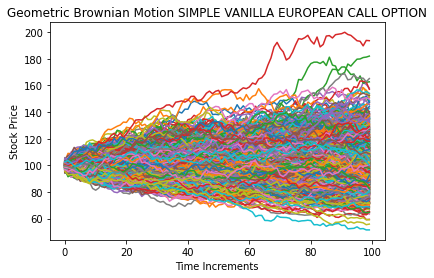

In [16]:
plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion SIMPLE VANILLA EUROPEAN CALL OPTION")

In [17]:
#calculating the predicted value based on the monte carlo lines
payoffs = np.maximum(paths[-1] - K,0)
option_price = np.mean(payoffs) * np.exp(-r*T) # the reason we multiply by -r*T is to discount the value back to today.
print("The predicted value of the option is: ", option_price)

#calculating the theoretical value using black-scholes formula
theoretical_value = black_scholes_call(S,K,T,r,q,sigma)
print("The theoretical value of the option is: ", theoretical_value)

The predicted value of the option is:  4.041238135867577
The theoretical value of the option is:  3.7451887662410783


As you can see, it's not super accurate. Let's try increasing N and see what happens...

In [18]:
N=1000000
steps = 100
paths= geo_paths(S,T,r, q,sigma,steps,N)
payoffs = np.maximum(paths[-1] - K,0)
option_price = np.mean(payoffs) * np.exp(-r*T)
print("The predicted value of the option is: ", option_price)
print("The theoretical value of the option is: ", theoretical_value)

The predicted value of the option is:  3.85807318024334
The theoretical value of the option is:  3.7451887662410783


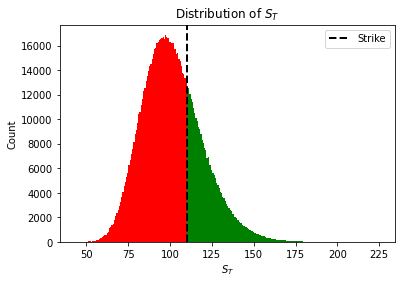

In [19]:
n, bins, patches = plt.hist(paths[-1],bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()